In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
%matplotlib inline

In [67]:
train = pd.read_csv("./train.csv", parse_dates = ['timestamp'])
print train.shape
test = pd.read_csv("./test.csv", parse_dates = ['timestamp'])
print test.shape
macro = pd.read_csv("./macro.csv", parse_dates = ['timestamp'])
print macro.shape
train.head()

(30471, 292)
(7662, 291)
(2484, 100)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [68]:
# Merge the train and test with macro
train_full_set = pd.merge(train, macro, how = 'left', on = 'timestamp')
test_full_set = pd.merge(test, macro, how = 'left', on = 'timestamp')

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
train_full_set.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [66]:
#train_full_set.apply(lambda x: type(x[0]))
type(train_full_set)

pandas.core.frame.DataFrame

In [69]:
# Let's do property features again, but this time with all macros
def features_selection(df):
    '''
    Select the features that we want to include from original training/test/macro set
    '''
    features = ['timestamp', 'full_sq', 'life_sq', 'floor', 
                        'max_floor', 'material', 'build_year', 'num_room',
                        'kitch_sq', 'state', 'price_doc']
    df = df[features]
    return df

In [71]:
train_housing_features = features_selection(train_full_set)
test_features = ['timestamp', 'full_sq', 'life_sq', 'floor', 
                        'max_floor', 'material', 'build_year', 'num_room',
                        'kitch_sq', 'state']
#train_housing_features = features_selection(train)
test_housing_features = test_full_set[test_features]

In [144]:
# with just the training set and test set (not merged with macro)
train = features_selection(train)
test = test[test_features]

In [72]:
train_housing_features.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5850000
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6000000
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5700000
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,13100000
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,16331452


In [73]:
test_housing_features.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0
1,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0


In [46]:
# what's missing?
print np.sum(train_housing_features.isnull())
print train_housing_features.shape

timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
state         13559
dtype: int64
(30471, 10)


In [74]:
# Let's merge the entire macro set with the train/test feature sets
train_df = pd.merge(train_housing_features, macro, how = 'left', on = 'timestamp')
test_df = pd.merge(test_housing_features, macro, how = 'left', on = 'timestamp')

In [75]:
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5850000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,41.7681,108.62,0.301811,46308.5,0.045037,5.76,6.74,1575.33,1438.74,131.16,204.78,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6000000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,41.7537,109.31,0.301811,46308.5,0.045037,5.76,6.74,1578.91,1444.11,131.45,204.92,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5700000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,41.7114,111.36,0.301811,46308.5,0.045037,5.76,6.74,1596.17,1458.84,131.08,204.84,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,

In [76]:
## Do some encoding to any categorical variables
from sklearn.preprocessing import LabelEncoder

def encode_object_features(train, test):
    '''(DataFrame, DataFrame) -> DataFrame, DataFrame
    
    Will encode each non-numerical column.
    '''
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    cols_to_encode = train.select_dtypes(include=['object'], exclude=['int64', 'float64']).columns
    for col in cols_to_encode:
        le = LabelEncoder()
        #Fit encoder
        le.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
        #Transform
        train[col] = le.transform(list(train[col].values.astype('str')))
        test[col] = le.transform(list(test[col].values.astype('str')))
    
    return train, test

In [77]:
train_df, test_df = encode_object_features(train_df, test_df)

In [145]:
train, test = encode_object_features(train, test)

In [147]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0
1,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0


# Some Feature Engineering

In [78]:
# Do stuff with the date
def add_date_features(df):
    '''(DataFrame) -> DataFrame
    
    Will add some specific columns based on the date
    of the sale.
    '''
    #Convert to datetime to make extraction easier
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #Extract features
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['year'] = df['timestamp'].dt.year
    
    #These features inspired by Bruno's Notebook at https://www.kaggle.com/bguberfain/naive-xgb-lb-0-317
    #Month-Year
    #month_year = df['timestamp'].dt.month + df['timestamp'].dt.year * 100
    #month_year_map = month_year.value_counts().to_dict()
    #df['month_year'] = month_year.map(month_year_map)
    #Week-Year
    week_year = df['timestamp'].dt.weekofyear + df['timestamp'].dt.year * 100
    week_year_map = week_year.value_counts().to_dict()
    df['week_year'] = week_year.map(week_year_map)
    df.drop('timestamp', axis=1, inplace=True)
    return df

In [79]:
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)

In [148]:
train = add_date_features(train)
test = add_date_features(test)

In [113]:
train_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,month,day,year,week_year
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5850000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,29.0048,41.7681,108.62,0.301811,46308.5,0.045037,5.76,6.74,1575.33,1438.74,131.16,204.78,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0,1391.710938,89.0495,3,3,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,8,20,2011,1
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6000000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.9525,41.7537,109.31,0.301811,46308.5,0.045037,5.76,6.74,1578.91,1444.11,131.45,204.92,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,0,1391.710938,89.0495,3,3,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0,8,23,2011,2
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5700000,109.31,14313.7,3.3,354.0,420.7,86.721,15.459,10.1,28.8082,41.7114,111.36,0.301811,46308.5,0.045037,5.76,6.74,1596.17,1458.84,131.08,204.84,10618898,0.009740,4.1,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.047,286.952,106.6,6643.626,0.014,0.708,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.1,5.1,6.2,10.8,9.7,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.0

In [149]:
train.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,price_doc,month,day,year,week_year
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5850000,8,20,2011,1
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,6000000,8,23,2011,2
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5700000,8,27,2011,2
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,13100000,9,1,2011,1
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,16331452,9,5,2011,5


# Cross Validation

In [106]:
#Get Data
Y_train = np.log(train_df['price_doc']).values
X_train = train_df.ix[:, train_df.columns != 'price_doc'].values
X_test = test_df.values

print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)

(30471,)
(30471, 112)
(7662, 112)


In [150]:
#Get Data
y_train = np.log(train['price_doc']).values
x_train = train_df.ix[:, train.columns != 'price_doc'].values
x_test = test.values

print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(30471,)
(30471, 13)
(7662, 13)


In [107]:
# Do what Shu did. Create a cross validation set manually

# Create a validation set, with last 20% of data
size_ = 7000
X_train_sub, Y_train_sub = X_train[:-size_],  Y_train[:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]


dtrain = xgb.DMatrix(X_train, 
                    Y_train)
dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub)
d_val = xgb.DMatrix(X_val, 
                    Y_val)
dtest = xgb.DMatrix(X_test)

In [151]:
# Create a validation set, with last 20% of data
size_ = 7000
x_train_sub, y_train_sub = x_train[:-size_],  y_train[:-size_]
x_val, y_val = x_train[-size_:],  y_train[-size_:]


dtrain = xgb.DMatrix(x_train, 
                    y_train)
dtrain_sub = xgb.DMatrix(x_train_sub, 
                        y_train_sub)
d_val = xgb.DMatrix(x_val, 
                    y_val)
dtest = xgb.DMatrix(x_test)

In [108]:
# hyperparameters
xgb_params = {
    'eta': 0.02,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=2000,
                      evals=[(d_val, 'val')],
                      early_stopping_rounds=20, 
                      verbose_eval=20)


[0]	val-rmse:14.9202
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:10.0028
[40]	val-rmse:6.71784
[60]	val-rmse:4.52605
[80]	val-rmse:3.07599
[100]	val-rmse:2.14284
[120]	val-rmse:1.53248
[140]	val-rmse:1.13244
[160]	val-rmse:0.881581
[180]	val-rmse:0.729249
[200]	val-rmse:0.639423
[220]	val-rmse:0.585421
[240]	val-rmse:0.553616
[260]	val-rmse:0.538471
[280]	val-rmse:0.527276
[300]	val-rmse:0.521206
[320]	val-rmse:0.516509
[340]	val-rmse:0.514092
[360]	val-rmse:0.513008
[380]	val-rmse:0.511398
[400]	val-rmse:0.509945
Stopping. Best iteration:
[397]	val-rmse:0.509766



In [152]:
# hyperparameters
xgb_params = {
    'eta': 0.02,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=2000,
                      evals=[(d_val, 'val')],
                      early_stopping_rounds=20, 
                      verbose_eval=20)


[0]	val-rmse:14.9197
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:10.0015
[40]	val-rmse:6.71713
[60]	val-rmse:4.52397
[80]	val-rmse:3.06626
[100]	val-rmse:2.10205
[120]	val-rmse:1.47057
[140]	val-rmse:1.06248
[160]	val-rmse:0.807613
[180]	val-rmse:0.655583
[200]	val-rmse:0.568248
[220]	val-rmse:0.520065
[240]	val-rmse:0.4943
[260]	val-rmse:0.479669
[280]	val-rmse:0.471041
[300]	val-rmse:0.466046
[320]	val-rmse:0.462619
[340]	val-rmse:0.46057
[360]	val-rmse:0.459258
[380]	val-rmse:0.457856
[400]	val-rmse:0.456986
[420]	val-rmse:0.456531
Stopping. Best iteration:
[414]	val-rmse:0.456354



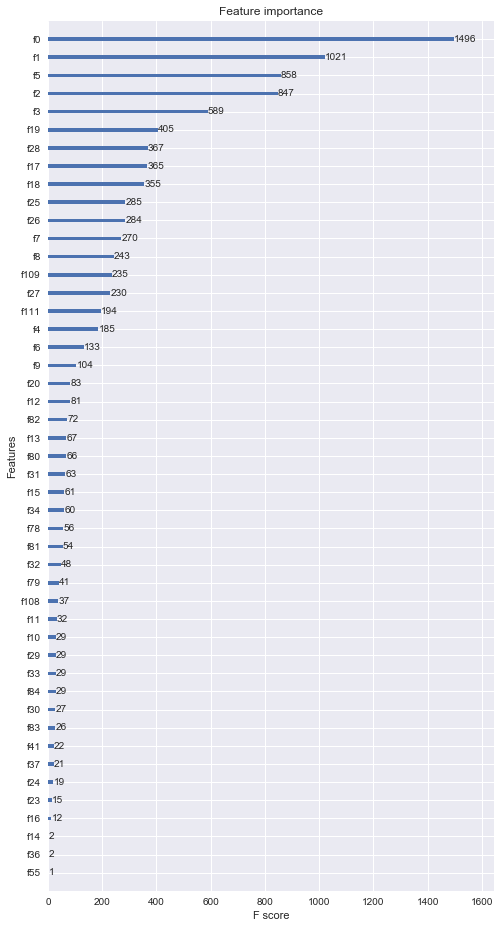

In [111]:
# Check importance
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(sub_model, ax=ax)

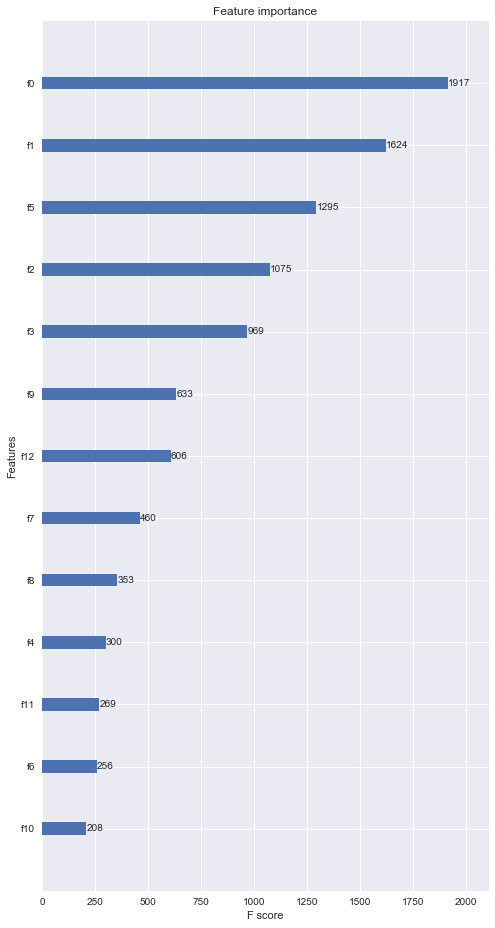

In [153]:
# Check importance
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(sub_model, ax=ax)

In [98]:
#from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# Try cross-validating the other way.
#Initialize Model
xgb_reg = XGBRegressor()
#Create cross-validation
cv = TimeSeriesSplit(n_splits=5)
#Train & Test Model
cross_val_results = cross_val_score(xgb_reg, X_train, Y_train, cv=cv, scoring='neg_mean_squared_error')
print(cross_val_results.mean())

-0.235946388676


trial number 0
KFold(n_splits=3, random_state=0, shuffle=True)
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 12.1min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.3min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.4min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.4min finished


trial number 1
KFold(n_splits=3, random_state=1, shuffle=True)
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 12.0min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.4min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.4min finished


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.6min finished


trial number 2
KFold(n_splits=3, random_state=2, shuffle=True)
Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
XGBRegressor().get_params().keys()

In [140]:
np.arange(0,1,.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])